In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

In [32]:
Player_information = pd.read_csv('Player_information.csv', engine='python')
Player_action = pd.read_csv('Player_action.csv', engine='python')
Group_activity = pd.read_csv('Group_activity.csv', engine='python')
labeled_accounts = pd.read_csv('labeled_accounts.csv', engine='python')

# merge // get train and validation sets (get only the accounts labeled)

In [33]:
final = pd.merge(Player_information, Player_action, how='outer', on = "actor_account")
final = pd.merge(final, Group_activity, how='outer',  on = "actor_account")

In [34]:
final = pd.merge(final, labeled_accounts, how='inner', on = 'actor_account')
final.fillna(0, inplace=True)
print(final.shape)
final.head()

(8100, 24)


,actor_account,login_count,logout_count,login_day_count,play_time,avg_money,ip_count,max_level,sit_count,exp_get_amout,...,use_portal_count,killed_by_pc,killed_by_npc,teleport_count,reborn_count,question_count,total_party_time,guild_join_count,average_party_time,class
0,20000005,259.0,259.0,1.0,637926.0,124.849465,259.0,0.0,270.0,3.891496e+08,...,0.0,47.0,30.0,376.0,51.0,62.0,8862.0,0.0,1477.000000,0
1,20000016,38.0,37.0,1.0,401885.0,43.509962,38.0,42.0,153.0,8.011943e+07,...,0.0,32.0,75.0,343.0,75.0,5893.0,69458.0,0.0,3655.684211,0
2,20000033,43.0,42.0,1.0,240334.0,-6.613812,43.0,38.0,378.0,1.424854e+08,...,0.0,35.0,53.0,337.0,69.0,97.0,43619.0,0.0,2295.736842,0
3,20000035,25.0,24.0,1.0,1205493.0,0.088531,25.0,0.0,207.0,1.377553e+09,...,0.0,0.0,12.0,44.0,10.0,0.0,0.0,0.0,0.000000,0
4,20000051,110.0,109.0,1.0,457433.0,-32.874878,110.0,0.0,320.0,3.950991e+08,...,1.0,311.0,109.0,568.0,261.0,80.0,40934.0,0.0,2558.375000,0


# Model Training

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#import xgboost as xgb

In [36]:
model_data = final.copy()
del model_data['actor_account']
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

In [13]:
model_data.head()

,login_count,logout_count,login_day_count,play_time,avg_money,ip_count,max_level,sit_count,exp_get_amout,item_get_count,...,use_portal_count,killed_by_pc,killed_by_npc,teleport_count,reborn_count,question_count,total_party_time,guild_join_count,average_party_time,class
0,259.0,259.0,1.0,637926.0,124.849465,259.0,0.0,270.0,3.891496e+08,31149.0,...,0.0,47.0,30.0,376.0,51.0,62.0,8862.0,0.0,1477.000000,0
1,38.0,37.0,1.0,401885.0,43.509962,38.0,42.0,153.0,8.011943e+07,61579.0,...,0.0,32.0,75.0,343.0,75.0,5893.0,69458.0,0.0,3655.684211,0
2,43.0,42.0,1.0,240334.0,-6.613812,43.0,38.0,378.0,1.424854e+08,24686.0,...,0.0,35.0,53.0,337.0,69.0,97.0,43619.0,0.0,2295.736842,0
3,25.0,24.0,1.0,1205493.0,0.088531,25.0,0.0,207.0,1.377553e+09,109795.0,...,0.0,0.0,12.0,44.0,10.0,0.0,0.0,0.0,0.000000,0
4,110.0,109.0,1.0,457433.0,-32.874878,110.0,0.0,320.0,3.950991e+08,98368.0,...,1.0,311.0,109.0,568.0,261.0,80.0,40934.0,0.0,2558.375000,0


In [15]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

7500


## Create Datasets with Balanced 0,1 Ratio for Ensemble

In [190]:
train, test = train_test_split(model_data, test_size=0.3)

In [191]:
x_test_b = test.iloc[:,:-1]

In [192]:
y_test_b = test.iloc[:,-1]

In [193]:
bot = train[train.iloc[:,-1] == 1]
human = train[train.iloc[:,-1] == 0]

In [194]:
testset = [0,1,2,3,4,5,6,7,8,9,10,11,12]

for i in range(0, int(len(human.index)/len(bot.index))):
    testset[i] = pd.concat([bot, human[413*i:413*(i+1)]])
    
bot12 = bot.sample(n=len(human[413*12:].index))
testset[12] = pd.concat([bot12, human[413*12:]])

In [195]:
for i in range(0, int(len(human.index)/len(bot.index))+1):
    testset[i] = testset[i].sample(frac=1)

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

NameError: name 'x_train' is not defined

## RF Proba Manipulation

## RF Result

In [323]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.93      1.00      0.96      2251
         Bot       0.00      0.00      0.00       179

    accuracy                           0.93      2430
   macro avg       0.46      0.50      0.48      2430
weighted avg       0.86      0.93      0.89      2430



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred_rf))
print("F1 score: %.2f" %f1_score(y_test, y_pred_rf))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [18]:
# train데이터를 넣어 복제함
X_resampled, Y_resampled = sm.fit_sample(x_train,list(y_train))

## Proba Manipulation Result

In [326]:
rf_proba = rnd_clf.predict_proba(x_test)[:,0]

x = np.arange(0, 1.01, 0.01)
y = np.arange(0, 1.01, 0.01)
z = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred_rf = ((rf_proba) > i).astype(int)
    y[int(i*100)] = accuracy_score(y_test, y_pred_rf)
    z[int(i*100)] = f1_score(y_test_b, y_pred_rf)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [329]:
max(z)

0.58

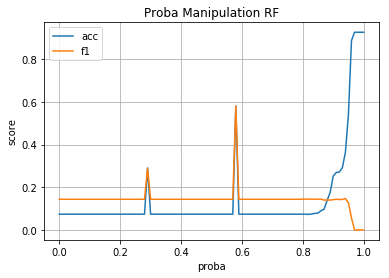

In [331]:
ax = plt.subplot(111)

ax.plot(x, y, label='acc')
ax.plot(x, z, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF')
ax.legend(loc='upper left')
ax.grid()

## Ensemble RF with Balanced Dataset (Soft Voting)

In [245]:
rnd_clf_ens = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
y_pred_rf_parts = list(range(0,13))

for i in range(0,13):
    rnd_clf_ens.fit(testset[i].iloc[:,:-1], testset[i].iloc[:,-1])
    y_pred_rf_parts[i] = rnd_clf_ens.predict_proba(x_test_b)[:,1]

In [246]:
y_pred_rf_ave = np.zeros(np.shape(y_pred_rf[1]))
for i in range(0,13):
    y_pred_rf_ave += y_pred_rf_parts[i]

In [247]:
y_pred_rf_ave /13

array([0.60085937, 0.31259711, 0.63049703, ..., 0.33717452, 0.3240449 ,
       0.41435894])

In [248]:
y_pred_rf_ens = ((y_pred_rf_ave / 13) > 0.5).astype(int)

In [249]:
from sklearn.metrics import classification_report

print(classification_report(y_test_b, y_pred_rf_ens, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.97      0.71      0.82      2242
         Bot       0.18      0.78      0.30       188

    accuracy                           0.71      2430
   macro avg       0.58      0.75      0.56      2430
weighted avg       0.91      0.71      0.78      2430



In [24]:
print("Accuracy: %.2f" %accuracy_score(y_test_b, y_pred_rf_ens))
print("F1 score: %.2f" %f1_score(y_test_b, y_pred_rf_ens))

NameError: name 'accuracy_score' is not defined

## Ensemble RF with Proba Manipulation

In [332]:
x = np.arange(0, 1.01, 0.01)
y = np.arange(0, 1.01, 0.01)
z = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred_rf_ens = ((y_pred_rf_ave / 13) > i).astype(int)
    y[int(i*100)] = accuracy_score(y_test_b, y_pred_rf_ens)
    z[int(i*100)] = f1_score(y_test_b, y_pred_rf_ens)

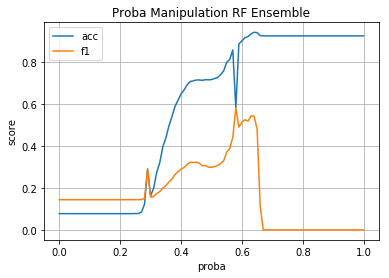

In [333]:
ax = plt.subplot(111)

ax.plot(x, y, label='acc')
ax.plot(x, z, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF Ensemble')
ax.legend(loc='upper left')
ax.grid()

# Smote RF with Proba Manipulation

In [39]:
# train데이터를 넣어 복제함
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_resampled, Y_resampled = sm.fit_sample(x_train,list(y_train))

#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
rnd_clf.fit(X_resampled, Y_resampled)
y_pred_rf = rnd_clf.predict_proba(x_test)[:,1]

In [43]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((y_pred_rf) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

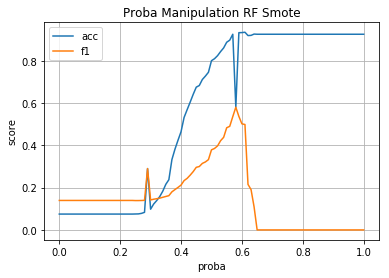

In [48]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF Smote')
ax.legend(loc='upper left')
ax.grid()

## 로지스틱

In [16]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit_transform(x_train)
# x_train = scaler.fit_transform(x_train)

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[("lr", log_clf),("rf", rnd_clf),("svc", svm_clf)], voting="hard")

log_clf.fit(x_train, y_train)
#log_clf.fit(X_resampled, Y_resampled)
# y_pred = log_clf.predict(X_test)
y_pred = np.where(log_clf.predict_proba(x_test)[:,1]>0.50, 1, 0)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [261]:
print(list(y_pred).count(1))

270


In [262]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2251
           1       0.25      0.38      0.30       179

    accuracy                           0.87      2430
   macro avg       0.60      0.65      0.62      2430
weighted avg       0.90      0.87      0.88      2430



In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2250
           1       0.20      0.31      0.24       180

    accuracy                           0.86      2430
   macro avg       0.57      0.60      0.58      2430
weighted avg       0.89      0.86      0.87      2430



# csv 파일로 만들기

In [197]:
Player_information.to_csv("Player_information.csv", encoding="utf8")
Player_action.to_csv("Player_action.csv", encoding="utf8")
Group_activity.to_csv("Group_activity.csv", encoding="utf8")